# Loan Eligibility Prediction


## Import relevant labraries 
Loan eligibility prediction is a machine learning application used by financial institutions to determine whether a loan applicant is likely to repay the loan based on various factors. By analyzing historical data, the model can learn patterns that help it predict the loan approval status for new applicants. This approach allows banks and financial institutions to make data-driven decisions, reducing the risk of defaults and ensuring better loan portfolio management.

### Datasets

The dataset for loan eligibility prediction typically contains the following columns:

- Loan_ID: A unique identifier for each loan application.
- Gender: The gender of the applicant, usually categorized as 'Male' or 'Female'.
- Married: The marital status of the applicant, indicating whether they are married or not.
- Dependents: The number of dependents the applicant has, often represented as '0', '1', '2', or'3+'.
- Education: The educational qualification of the applicant, generally categorized as 'Graduate' or 'Not Graduate'.
- Self_Employed: A binary variable indicating whether the applicant is self-employed or not.
- ApplicantIncome: The income of the loan applicant.
- CoapplicantIncome: The income of the co-applicant (if any).
- LoanAmount: The loan amount requested by the applicant.
- Loan_Amount_Term: The term of the loan in months.
- Credit_History: A binary variable indicating whether the applicant has a credit history or not.
- Property_Area: The area where the property is located, typically categorized as 'Urban', 'Semiurban', or 'Rural'.
- Loan_Status: The target variable indicating whether the loan application was approved ('Y') or not ('N').


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
raw_data = pd.read_csv("D:\\Data_Science_Project\\Project_5\\train.csv")
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df = raw_data.copy()

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data Cleaning and Data preprocessiing 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


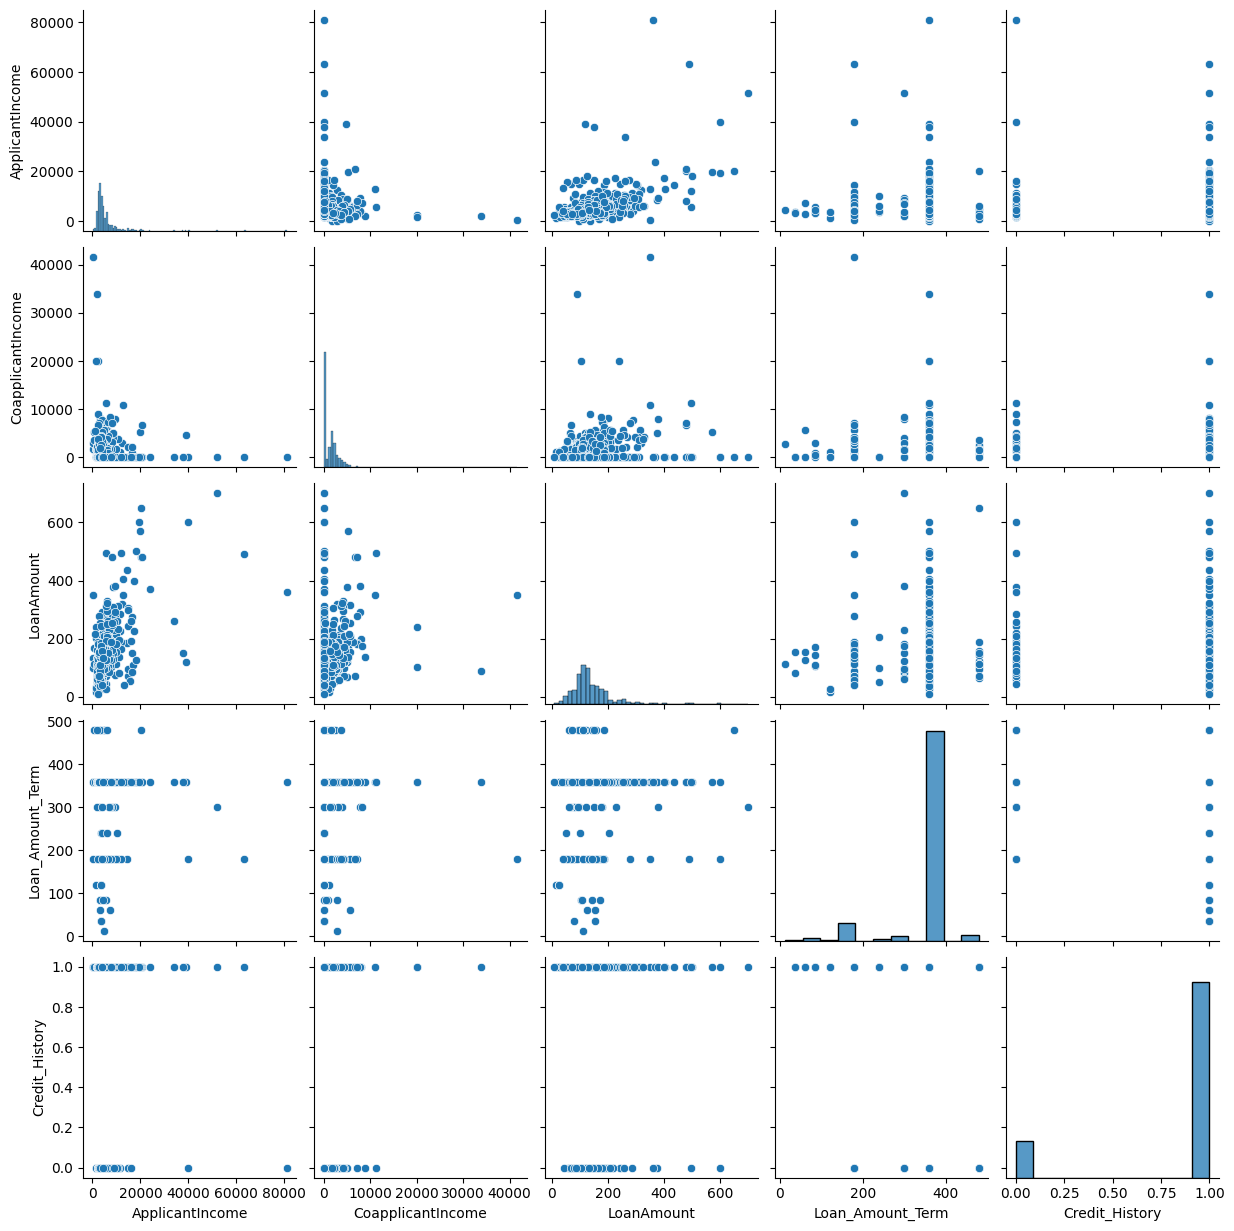

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

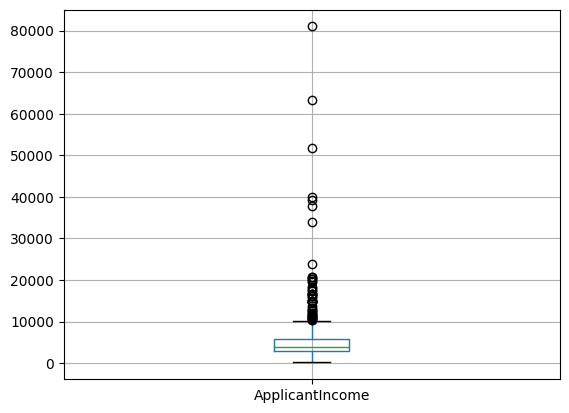

In [9]:
df.boxplot(column = 'ApplicantIncome')

In [10]:
df['ApplicantIncome'].head()

0    5849
1    4583
2    3000
3    2583
4    6000
Name: ApplicantIncome, dtype: int64

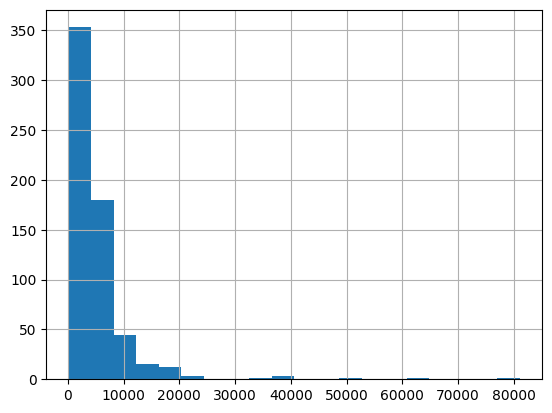

In [11]:
df['ApplicantIncome'].hist(bins= 20)
plt.show()

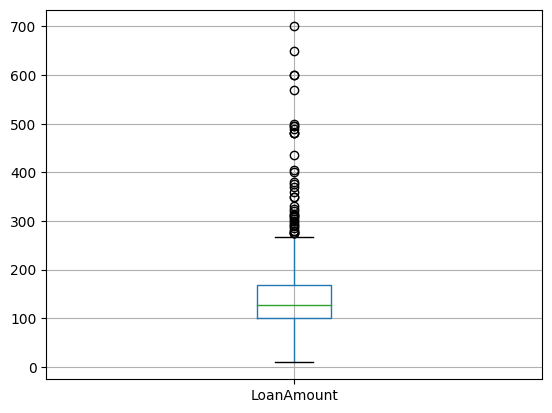

In [12]:
df.boxplot(column = 'LoanAmount')
plt.show()

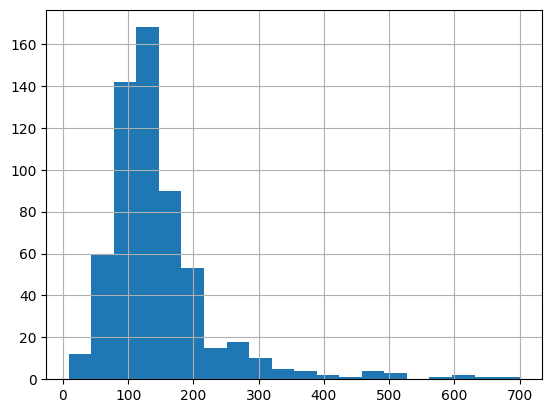

In [13]:
df['LoanAmount'].hist(bins = 20)
plt.show()

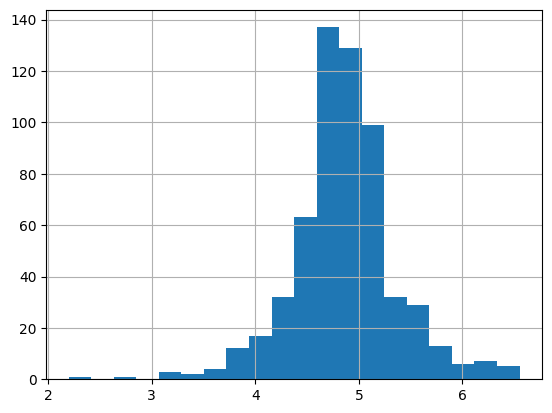

In [14]:
# Normalization
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins = 20)
plt.show()

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [16]:
# df["ApplicantIncome"].fillna(0,inplace =True)

In [17]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace =True)


In [18]:
df["Married"].fillna(df["Married"].mode()[0],inplace =True)


In [19]:
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace =True)


In [20]:
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace =True)


In [21]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace =True)
df["LoanAmount_log"].fillna(df["LoanAmount_log"].mean(),inplace =True)


In [22]:
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace =True)


In [23]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace =True)


In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap for all Numerial Variables')

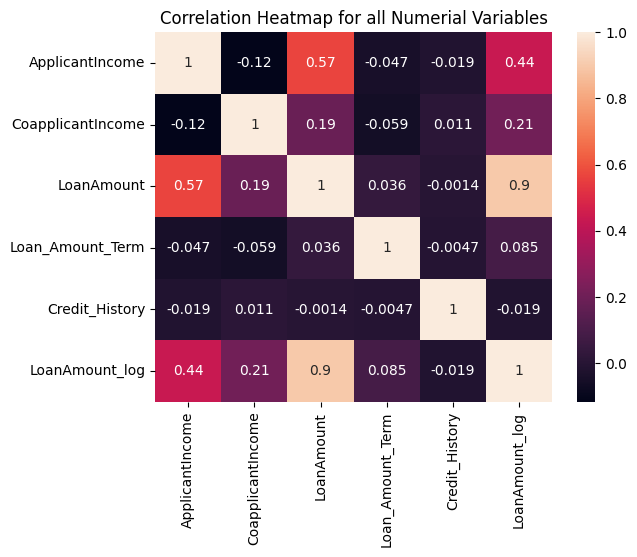

In [25]:
# Heatmap => All numerical data 
num_df = df.select_dtypes(include=['number']) 
sns.heatmap(num_df.corr(), annot=True)
plt.title("Correlation Heatmap for all Numerial Variables")

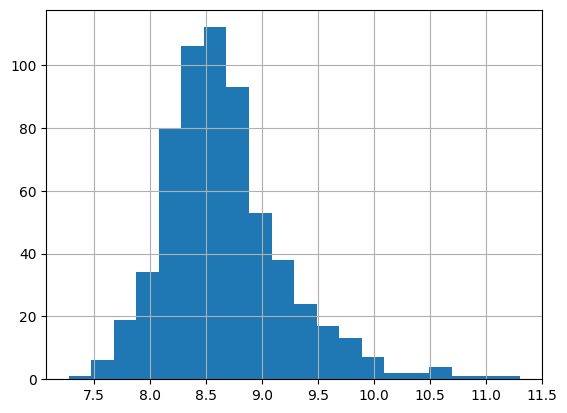

In [26]:
df["TotalIncome"] = df['ApplicantIncome'] +df["CoapplicantIncome"]
df["TotalIncome_log"] =np.log(df["TotalIncome"])
df["TotalIncome_log"].hist(bins = 20)
plt.show()

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


##  Features and target

In [28]:
X = df.iloc[:,np.r_[1:5,9:11,13:15]].values
Y = df.iloc[:,12].values

In [29]:
X[:5]

array([['Male', 'No', '0', 'Graduate', 360.0, 1.0, 4.857444178729352,
        5849.0],
       ['Male', 'Yes', '1', 'Graduate', 360.0, 1.0, 4.852030263919617,
        6091.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 4.189654742026425,
        3000.0],
       ['Male', 'Yes', '0', 'Not Graduate', 360.0, 1.0,
        4.787491742782046, 4941.0],
       ['Male', 'No', '0', 'Graduate', 360.0, 1.0, 4.948759890378168,
        6000.0]], dtype=object)

In [30]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

# Split the data

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((491, 8), (123, 8), (491,), (123,))

In [32]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [34]:
for i in range(0,5):
    X_train[:,i] =labelencoder_X.fit_transform(X_train[:,i])

In [35]:
X_train[:,7] =labelencoder_X.fit_transform(X_train[:,7])

In [36]:
X_train[:5]

array([[1, 1, 0, 0, 7, 1.0, 4.875197323201151, 267],
       [1, 0, 1, 0, 7, 1.0, 5.278114659230517, 407],
       [1, 1, 0, 0, 7, 0.0, 5.003946305945459, 249],
       [0, 0, 0, 0, 4, 1.0, 4.7535901911063645, 97],
       [1, 1, 2, 0, 7, 1.0, 5.0106352940962555, 276]], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
Y_train =labelencoder_y.fit_transform(Y_train)
Y_train[:5]

array([1, 0, 0, 1, 1])

In [38]:
for i in range(0,5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])

X_test[:5]

X_test[:,7] =labelencoder_X.fit_transform(X_test[:,7])

In [39]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [40]:
Y_test =labelencoder_y.fit_transform(Y_test)
Y_test[:5]

array([1, 0, 1, 0, 1])

In [41]:
## Standardizatio of Data 

In [42]:
from sklearn.preprocessing import StandardScaler 

scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.fit_transform(X_test)
X_train

array([[ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
         0.03484798,  0.29186348],
       [ 0.47374983, -1.40561644,  0.22549137, ...,  0.41790088,
         0.83102078,  1.36113256],
       [ 0.47374983,  0.71143163, -0.76304669, ..., -2.39291191,
         0.28925857,  0.15438603],
       ...,
       [ 0.47374983,  0.71143163,  2.2025675 , ...,  0.41790088,
         0.87094174,  1.02507656],
       [ 0.47374983,  0.71143163, -0.76304669, ...,  0.41790088,
         0.43000557,  0.3376893 ],
       [-2.11081869,  0.71143163, -0.76304669, ...,  0.41790088,
         0.68458193,  0.55154312]])

# Create and train the model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [44]:
## Model_1:Logistic Regression

In [45]:
model_1 = LogisticRegression()
model_1.fit(X_train,Y_train)

LogisticRegression()

In [46]:
## Model_1:Evaluation 

In [49]:
pred1 = model_1.predict(X_test)
score1 = accuracy_score(pred1,Y_test)
print(f'Accuracy: {score1 * 100:.2f}%')

Accuracy: 82.93%


In [ ]:
## Model_2: Support Vector Machine 

In [50]:
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(X_train,Y_train)

SVC()

In [54]:
pred2 = model_2.predict(X_test)
score2  = accuracy_score(pred2,Y_test)
print(f'Accuracy: {score2 * 100:.2f}%')

Accuracy: 82.93%


## Model 3 .DecisionTreeClassification

In [56]:
from sklearn.tree import DecisionTreeClassifier

Model_3 = DecisionTreeClassifier()
Model_3.fit(X_train,Y_train)


DecisionTreeClassifier()

In [57]:
pred3 = Model_3.predict(X_test)
score3 = accuracy_score(pred3,Y_test)
print(f'Accuracy: {score3 * 100:.2f}%')

Accuracy: 73.17%


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [59]:
pred4 = knn.predict(X_test)
score4 = accuracy_score(pred4,Y_test)
print(f'Accuracy: {score4 * 100:.2f}%')

Accuracy: 79.67%


In [60]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')